In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.vision.all import *
from fastaudio.core.all import *
from fastaudio.augment.all import *

In [3]:
path = Path("/home/kkalyan/agri-split/")

In [4]:
(path/"audio_files").ls()

(#2126) [Path('/home/kkalyan/agri-split/audio_files/BK8UDCM.wav'),Path('/home/kkalyan/agri-split/audio_files/3B5A2P3.wav'),Path('/home/kkalyan/agri-split/audio_files/7QXN2WO.wav'),Path('/home/kkalyan/agri-split/audio_files/E04FSN7.wav'),Path('/home/kkalyan/agri-split/audio_files/O0L4PC1.wav'),Path('/home/kkalyan/agri-split/audio_files/0TYHMIF.wav'),Path('/home/kkalyan/agri-split/audio_files/48PTKS5.wav'),Path('/home/kkalyan/agri-split/audio_files/J28NE2C.wav'),Path('/home/kkalyan/agri-split/audio_files/3J8WKXR.wav'),Path('/home/kkalyan/agri-split/audio_files/67FIJLB.wav')...]

In [5]:
df = pd.read_csv(path/"Train.csv")
df.head()

,fn,label
0,audio_files/IV38R7F.wav,akawuka
1,audio_files/KM4SKWT.wav,banana
2,audio_files/F5POSU9.wav,obulwadde
3,audio_files/MMVDXG2.wav,nnyaanya
4,audio_files/9TVM96F.wav,pampu


In [6]:
from fastaudio.augment.spectrogram import CropTime

In [7]:
ct = CropTime(duration=1000)
cfg = AudioConfig.BasicMelSpectrogram(n_fft=512)
a2s = AudioToSpec.from_cfg(cfg)

In [8]:
auds = DataBlock(blocks=(AudioBlock, CategoryBlock),  
                 get_x=ColReader("fn", pref=path), 
                 batch_tfms = [a2s],
                 item_tfms=[ResizeSignal(3000), SignalShifter(), AddNoise()],
                 get_y=ColReader("label"))

In [9]:
dbunch = auds.dataloaders(df, bs=64)

/home/kkalyan/miniconda3/envs/fastaudio/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/kkalyan/miniconda3/envs/fastaudio/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


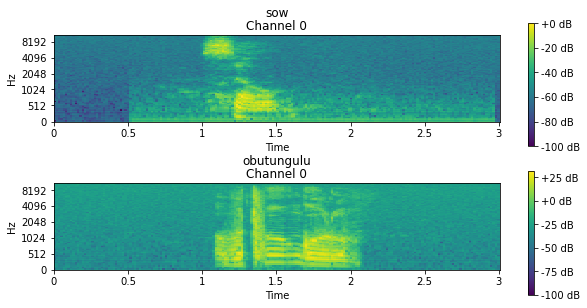

In [10]:
dbunch.show_batch(figsize=(10, 5))

In [13]:
learn = cnn_learner(dbunch, 
            resnet18, 
            config=cnn_config(n_in=1),
            loss_fn=CrossEntropyLossFlat,
            metrics=[accuracy]).to_fp16()

In [14]:
learn.fine_tune(3)

epoch,train_loss,valid_loss,accuracy,time
0,7.126196,5.875627,0.000000,00:02


epoch,train_loss,valid_loss,accuracy,time
0,6.831012,5.793357,0.013575,00:02
1,6.474598,5.674368,0.018100,00:02
2,6.167439,5.588383,0.009050,00:02
